In [0]:
# IMPORT LIBRARY
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# BACA DATA TITANIC.CSV
import pandas as pd
df = pd.read_csv('https://query.data.world/s/phe2lcq5qnzmlmskej66g4s6v3agfy')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# DATA CLEANING
# Variabel umur mengandung beberapa nilai NA. Karenanya diproses dengan mengisi usia rata-rata sesuai dengan kelas penumpang
mean_age = df[['Pclass','Age']].groupby('Pclass').mean()
mean_age

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [0]:
def clean_age(data2clean):
    
    pclass = data2clean[0];age = data2clean[1]
    if pd.isnull(age):
        if pclass == 1:
            return mean_age.loc[1]['Age']
        elif pclass == 2:
            return mean_age.loc[2]['Age']
        else:
            return mean_age.loc[3]['Age']
    else:
        return age

In [0]:
df['Age'] = df[['Pclass','Age']].apply(clean_age,axis = 1)

In [0]:
# Penumpang Kelas Tiga dihitung lebih dari dua kali lipat dari dua kelas lainnya maka tarif rata-rata kelas penumpang tiga dapat diisi untuk nilai yang hilang 
mean_fare = df[['Fare','Pclass']].groupby('Pclass').mean()
def clean_fares(col):
    fare = col[0]
    pclass = col[1]
    if pd.isnull(fare):
        if pclass == 1:
            return mean_fare.loc[1]['Fare']
        elif pclass == 2:
            return mean_fare.loc[2]['Fare']
        else:
            return mean_fare.loc[3]['Fare']
    else:
        return fare

In [0]:
df['Fare'] = df[['Fare','Pclass']].apply(clean_fares,axis = 1)

In [8]:
# Konversi data berkategori ke bentuk numerik
sex_train = pd.get_dummies(df['Sex'],drop_first=True)
embark_train = pd.get_dummies(df['Embarked'],drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df = pd.concat([df,sex_train,embark_train],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


In [0]:
# Pilih beberapa fitur untuk pemodelan. Ubah tipe data target menjadi integer untuk persyaratan algoritma skitlearn:
df = df[['PassengerId', 'Survived', 'Pclass', 'Fare', 'SibSp', 'Age', 'male', 'Q', 'S']].astype('int')

In [11]:
#INDEPENDENT VARIABLE

X = np.asarray(df[['Pclass', 'Fare', 'SibSp', 'Age', 'male', 'Q', 'S']])
X[0:5]

array([[ 3,  7,  1, 22,  1,  0,  1],
       [ 1, 71,  1, 38,  0,  0,  0],
       [ 3,  7,  0, 26,  0,  0,  1],
       [ 1, 53,  1, 35,  0,  0,  1],
       [ 3,  8,  0, 35,  1,  0,  1]])

In [12]:
#DEPENDENT VARIABLE
y = np.asarray(df['Survived'])
y [0:5]

array([0, 1, 1, 1, 0])

In [13]:
# Normalisasi dataset
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.82737724, -0.49894756,  0.43279337, -0.54771233,  0.73769513,
        -0.30756234,  0.61930636],
       [-1.56610693,  0.78940535,  0.43279337,  0.66323478, -1.35557354,
        -0.30756234, -1.61470971],
       [ 0.82737724, -0.49894756, -0.4745452 , -0.24497555, -1.35557354,
        -0.30756234,  0.61930636],
       [-1.56610693,  0.4270561 ,  0.43279337,  0.4361822 , -1.35557354,
        -0.30756234,  0.61930636],
       [ 0.82737724, -0.47881705, -0.4745452 ,  0.4361822 ,  0.73769513,
        -0.30756234,  0.61930636]])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (623, 7) (623,)
Test set: (268, 7) (268,)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0])

In [17]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.73303085, 0.26696915],
       [0.73373992, 0.26626008],
       [0.40400053, 0.59599947],
       [0.23321487, 0.76678513],
       [0.74506874, 0.25493126],
       [0.56453136, 0.43546864],
       [0.28730968, 0.71269032],
       [0.41553174, 0.58446826],
       [0.50824487, 0.49175513],
       [0.7126946 , 0.2873054 ],
       [0.74450327, 0.25549673],
       [0.66051194, 0.33948806],
       [0.36161409, 0.63838591],
       [0.76307046, 0.23692954],
       [0.27095793, 0.72904207],
       [0.61932413, 0.38067587],
       [0.75691029, 0.24308971],
       [0.46431331, 0.53568669],
       [0.72615237, 0.27384763],
       [0.29915512, 0.70084488],
       [0.69076702, 0.30923298],
       [0.70090276, 0.29909724],
       [0.68980346, 0.31019654],
       [0.68980346, 0.31019654],
       [0.348874  , 0.651126  ],
       [0.43345127, 0.56654873],
       [0.20576037, 0.79423963],
       [0.19932918, 0.80067082],
       [0.74515456, 0.25484544],
       [0.73847701, 0.26152299],
       [0.

In [18]:
# EVALUASI DENGAN JACCARD INDEX
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.8171641791044776

In [19]:
# EVALUASI DENGAN CONFUSION MATRIX
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[0,1]))

[[154  24]
 [ 25  65]]


Confusion matrix, without normalization
[[154  24]
 [ 25  65]]


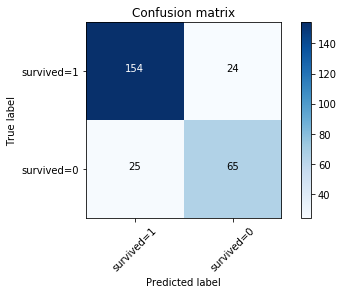

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)


# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['survived=1','survived=0'],normalize= False,  title='Confusion matrix')

In [21]:
# Hasil presisi,recall,f1score,accuracy
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       178
           1       0.73      0.72      0.73        90

    accuracy                           0.82       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.82      0.82      0.82       268



In [22]:
# Evaluasi log loss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.4812756180099502